# Week2授業課題 富士下山 

## 【問題1】断面図の作成
前述の断面図をMatplotlibを使い作成してください。x=136の地点の赤い点や矢印も表示させてください。

これ以降の問題では下りる過程の可視化を行いますが、その際にはこの断面図を活用してください。

In [1]:
 #指定ファイルのインポート
import numpy as np
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

#インポートファイルの確認
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


In [2]:
import matplotlib.pyplot as plt

#タイトル、ラベル名をつける
plt.title("Mt.Fuji")
plt.xlabel("x")
plt.ylabel("evelation[m]" )

#断面図を作成する
plt.plot(fuji[:,0], fuji[:,3])

#x=136の地点を赤くする
plt.scatter(136, fuji[136,3], c='r')

## 【問題2】勾配の計算の関数
授業前課題では各地点での勾配を最初に求めました。しかし、暗闇の富士山の比喩を考えると、知ることができるのはあなたがいる地点の勾配だけです。

ここでは「あなたが今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成しましょう。この関数が返す値を「今いる地点の勾配」として次の問題で作成する関数内で使ってください。

勾配は授業前課題で行ったように、以下の計算で求まります。

$$
    \frac{\mbox{yの変化量}}{\mbox{xの変化量}}
$$

このデータでは「標高（elevation)」がyに相当します。xはそのまま「その地点の番号(x)」です。

In [3]:
#　勾配（slope）の関数定義
def slope(x, y):
    #xの変化量（diff : n+1とnの差分をとる）
    x_diff = np.diff(x, axis=0)
    #yの変化量（diff : n+1とnの差分をとる）
    y_diff = np.diff(y, axis=0)
    
    #slope計算
    s = y_diff/x_diff
    
    return s

# fujiデータより、勾配を算出する
s = slope(fuji[:, 0], fuji[:, 3])
s[0:10]

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   6.62,   0.59,   4.99,
        42.21, 117.15])

In [4]:
#slopeの１行目に0を挿入（インデックスをx-1 -> xにするため）
s = np.insert(s, 0, 0)

#データの確認
s[0:10]

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  6.62,  0.59,  4.99,
       42.21])

In [5]:
# reshape : numpy配列の形状を変換する
s = s.reshape(s.size,1)

#変換したデータの確認
s[0:10]

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 6.62],
       [ 0.59],
       [ 4.99],
       [42.21]])

In [6]:
# fujiの６列目にslopeを代入
fuji = np.concatenate((fuji, s), axis=1)

#データの確認
fuji[0:10]

array([[   0.      ,   35.134141,  139.132082,    0.      ,    0.      ,
           0.      ],
       [   1.      ,   35.135826,  139.129202,    0.      ,  322.      ,
           0.      ],
       [   2.      ,   35.13751 ,  139.126322,    0.      ,  644.      ,
           0.      ],
       [   3.      ,   35.139194,  139.123441,    0.      ,  966.      ,
           0.      ],
       [   4.      ,   35.140878,  139.12056 ,    0.      , 1288.      ,
           0.      ],
       [   5.      ,   35.142562,  139.117679,    0.      , 1611.      ,
           0.      ],
       [   6.      ,   35.144246,  139.114799,    6.62    , 1933.      ,
           6.62    ],
       [   7.      ,   35.145929,  139.111917,    7.21    , 2255.      ,
           0.59    ],
       [   8.      ,   35.147613,  139.109036,   12.2     , 2577.      ,
           4.99    ],
       [   9.      ,   35.149297,  139.106155,   54.41    , 2899.      ,
          42.21    ]])

## 【問題3】勾配降下法の関数を作成
授業前課題では説明までとした勾配降下法ですが、これを行う関数を作成してください。

数式で表すと 「**移動すべき地点 = 今いる地点 - α×今いる地点の勾配**」 となります。

この関数を使い、あなたが今いるxが136の地点（標高3434.59[m]）から、山を下っていきましょう。移動毎の標高はリストに記録し、その過程を可視化してください。断面図を目視したり、読み込んだ数値を確認して分かることと比べてどうなっているでしょうか。

**実装上の注意**

移動すべき地点は基本的には少数となりますが、勾配の情報は整数値の場所でしか得られません。そのため、四捨五入により整数値に変換する必要があります。

**可視化のヒント**

断面図の中に点を表示したり、繰り返し毎の標高や勾配を折れ線グラフで見てみることができます。

**α の補足**

α は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わりますから、関数の引数にしてください。複数試し、うまく下りられる α の値を見つけましょう。

**初期値の補足**

最初に居たx=136の地点のことを初期値と呼びます。この初期値によってどこに下っていくかが変わりますから、これも関数の引数にしてください。

In [7]:
'''
input
    今いる地点：x（int)
    学習率：a(float)
    
output
    移動すべき地点(x(int))
'''

# 移動すべき地点の関数
def place_to_move(x=136, a = 0.1):
    
    place_to = int(x - a * fuji[x, 5])

    return place_to

#今いる地点をリストにし、初期値をセットする。
now_place = [136]
i = 0

#傾きの絶対値が指定の値より大きい間は移動の処理を行う
while abs(fuji[now_place[i], 5]) > 4 :
    #現在地点の表示
    print(now_place[-1])
    #現在地点より、次に移動する地点をリストに加える
    now_place.append(place_to_move(now_place[i]))
    #カウント更新
    i += 1


136
119
113
107
102
99
97
94
91
89
86
84
82


## 【問題4】初期値の変更
ここまでの問題では最初のxを136としましたが、xの初期値を変更すると結果が変化します。特にxを139より大きい値にすると、富士山の反対側の斜面を下りていくことになります。

そういった初期値を設定した上で、移動毎の標高はリストに記録し、その過程を可視化してください。

140
149
158
161
166
167
170
172
174
175


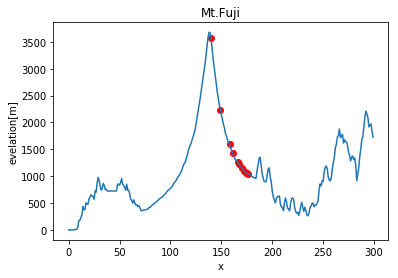

In [8]:
'''
初期値を変更する
'''

#今いる地点をリストにし、初期値をセットする。
now_place = [140]
i = 0

#傾きの絶対値が指定の値より大きい間は移動の処理を行う
while abs(fuji[now_place[i], 5]) > 4 :
    #現在地点の表示
    print(now_place[-1])
    #現在地点より、次に移動する地点をリストに加える
    now_place.append(place_to_move(now_place[i]))
    #カウント更新
    i += 1

#タイトル、ラベル名をつける
plt.title("Mt.Fuji")
plt.xlabel("x")
plt.ylabel("evelation[m]" )

#断面図を作成する
plt.plot(fuji[:,0], fuji[:,3])

#移動していった地点を赤くする
plt.scatter(now_place, fuji[now_place,3], c='r')

## 【問題5】（アドバンス課題）並列計算
初期値によって結果が変化するわけですから、0から299まで全ての初期値の計算を行ってみるということを考えられます。

for文を使い繰り返すこともできますが、NumPyの配列を工夫して使うことで複数の計算を同時に行うことができます。ここまで作成した関数を複数の初期値が同時に計算できるように改良してください。

この改良は次のハイパーパラメータの検証にも応用することができます。

ヒント

NumPyは配列間で四則演算などの操作が可能です。以下のサンプルコードの3行目と4行目の挙動を参考にしてください。特に4行目の計算はブロードキャストと呼ばれるNumPy独特の機能であるため、各自でも調査してください。
1. array1 = np.ones(300)
1. array2 = np.arange(300)
1. array3 = array1*array2
1. array4 = array3 + 1 # ブロードキャスト

In [9]:
#initial_values(list型)に任意の初期値を複数セットする
initial_values = np.array([100,136,160])

#任意の繰り返しカウントをセットする
repeat_count = 15

#任意の学習率をセットする
a = 0.1

#指定のカウント数に応じて、複数の初期値より計算を行う
for i in range(repeat_count):
    initial_values = np.array((initial_values -   a * fuji[initial_values,5]), np.int32)
    print(initial_values)

[ 98 119 164]
[ 96 113 166]
[ 93 107 167]
[ 91 102 170]
[ 89  99 172]
[ 86  97 174]
[ 84  94 175]
[ 82  91 176]
[ 80  89 176]
[ 79  86 176]
[ 76  84 176]
[ 75  82 176]
[ 74  80 176]
[ 73  79 176]
[ 71  76 176]


## 【問題6】（アドバンス課題）ハイパーパラメータの検証
勾配降下法の中で α はハイパーパラメータであり、前の問題でも複数試して良い結果が得られるものを探しました。これを発展させ、αを一定間隔で変化させていき、それぞれの山の下り方の比較を行ってください。うまい下り方となる αを見つけるだけではなく、大きかったり小さかった時にどうなるのかを検証して説明してください。

**ヒント**

検証のための一例として、横軸を α 、縦軸を一定回の繰り返し後のxや標高にした散布図を描いてみるという方法が考えられます。

[0.01 0.04 0.07 0.1  0.13 0.16 0.19 0.22 0.25 0.28 0.31 0.34 0.37 0.4
 0.43 0.46 0.49]
[80. 80. 80. 80. 75. 74. 80. 80. 79. 71. 78. 78. 76. 39. 67. 84. 75.]
[420.6  420.6  420.6  420.6  371.19 371.04 420.6  420.6  418.41 362.29
 390.14 390.14 377.62 724.5  469.66 488.4  371.19]


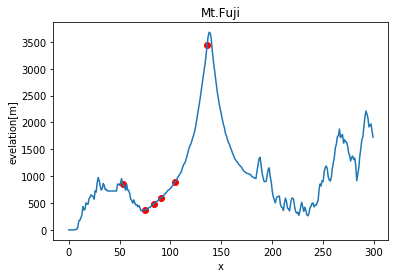

In [83]:
#今いる地点をリストにし、初期値をセットする。


#αを一定間隔で変化させたリストを生成
alpha =  np.arange(0.01, 0.5, 0.03)
print(alpha)

#一定回繰り返し後のx,標高の値格納リスト
finish_x = np.array([])
finish_y = np.array([])
for j in range(len(alpha)):
    now_place = [136]
    i = 0
    #傾きの絶対値が指定の値より大きい間は移動の処理を行う
    while abs(fuji[now_place[i], 5]) > 4 :        
        #現在地点より、次に移動する地点をリストに加える
        now_place.append(place_to_move(x=now_place[i], a=alpha[j]))
        #カウント更新
        i += 1
        # カウントが1000回になったらwhileループ処理を中止する
        if i == 1000:
            break
    #それぞれのalphaでの繰り返しごのx,標高の高さを格納する
    finish_x = np.append(finish_x, now_place[i])
    finish_y = np.append(finish_y, fuji[now_place[i],3])
    
print(finish_x)
print(finish_y)
        
    #タイトル、ラベル名をつける
plt.title("Mt.Fuji")
plt.xlabel("x")
plt.ylabel("evelation[m]" )

#断面図を作成する
plt.plot(fuji[:,0], fuji[:,3])

#移動していった地点を赤くする
plt.scatter(now_place, fuji[now_place,3], c='r')

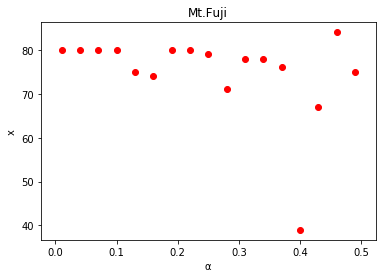

In [84]:
#横軸が学習率α、縦軸が地点xの散布図
plt.title("Mt.Fuji")
plt.xlabel("α")
plt.ylabel("x" )
plt.scatter(alpha, finish_x, c="r")

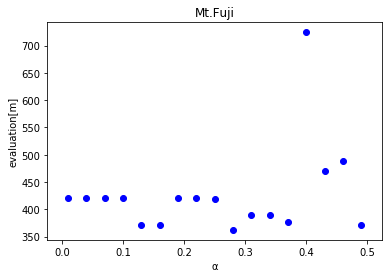

In [85]:
#横軸が学習率α、縦軸が標高の散布図
plt.title("Mt.Fuji")
plt.xlabel("α")
plt.ylabel("evaluation[m]" )
plt.scatter(alpha, finish_y, c="b")

### 結果について
今回、0.01から0.5までの公差0.03の等差数列にて学習率αを変化させた。  
上記の中で不定期にループ処理が収束しない学習率があったが、全体としてxが70から80ほどに収束し、麓ではない頂上から初めての谷あたりで収束していることが確認できる。

## 【問題7】（アドバンス課題）局所最適解
山を下りることで最終的には海（標高が0）に向かいたいですが、勾配降下法は「局所的最適解」となる地点にしか到達しない可能性があります。局所的最適解とはどういったもので、それへの対策はどういったことができるかを調査して説明してください。

言葉だけではなく、作成した関数も活用できると良いでしょう。

### 回答
勾配降下法では、グラフ上の山の上から下方向に向かって、「移動すべき地点」を探索していくが、出発地点から海に向かっていく途中に”谷”が存在する場合、その地点がパラーメータ上最も低い地点として収束し、局所解に捕まってしまうことがある。  
下図では、x=0の地点が標高=0になるが、勾配降下法では、x＝80あたりの”谷”にて局所解に捕まってしまうことが確認できる。

対策としては、ランダムにデータを１つ選んで、それをパラメータの更新に用いる「確率的勾配降下法」を利用することが効果的と考える。  
勾配効果法では、１度パラメータを更新する間に、確率的勾配降下法ではn回パラメータを更新でき、さらにデータをランダムに選んでその時点での勾配を使ってパラメータを更新するため、局所解に捕まりにくい性質がある。

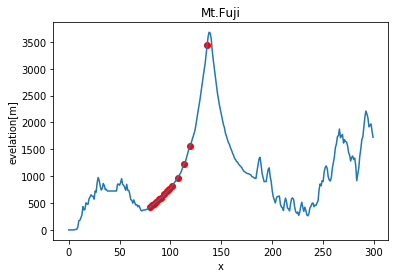

In [88]:
'''
初期値を変更する
'''

#今いる地点をリストにし、初期値をセットする。
now_place = [136]
i = 0

#傾きの絶対値が指定の値より大きい間は移動の処理を行う
while abs(fuji[now_place[i], 5]) > 4 :
    #現在地点の表示
    #print(now_place[-1])
    #現在地点より、次に移動する地点をリストに加える
    now_place.append(place_to_move(now_place[i]))
    #カウント更新
    i += 1

#タイトル、ラベル名をつける
plt.title("Mt.Fuji")
plt.xlabel("x")
plt.ylabel("evelation[m]" )

#断面図を作成する
plt.plot(fuji[:,0], fuji[:,3])

#移動していった地点を赤くする
plt.scatter(now_place, fuji[now_place,3], c='r')

ペアプロ：大木さん